# Stoneburner, Kurt
- ## DSC 630 - Week 03

## Dodgers 2012 Marketing Recommendation ##

#### Background ###
The Dodgers of 2012 were a solid but not exceptional team. They ranked 13th out of 30 teams for wins and did not advance to the post-season. The team's lackluster performance was unlikely improve in 2012 due to an ownership dispute resulting from the divorce of principal owners Frank and Jamie McCourt. Litigation and acrimony amongst ownership leaves no additional captial for team payroll investment. Barring a fluke success, the expectation is for attendance to decline as the season progresses. The thinking being, fans flock to success which is generally tied to team payroll.


#### Seasonal Correlations ####
Looking at correlations for the entire season, there is a small .04 correlation between month and attendance, indicating overall attendance slightly increases as the season progresses. When promotions are removed (Bobblehead, Shirt, & Cap) the correlation between month and attendance increases to .09. This indicates that promotions are to shift attendance earlier in the season.

Overall, Bobblehead (.58) and shirt promotions (.13) had the highest correlations with attendance. Without the promotions (Bobblehead, Shirt & Cap) the strongest correlations are day_of_week (.24) and skies (-.13). Day_of_week is interpreted as fans attending more games during Fri-Sun. Skies indicates a small fan preference for clear skies. 

|Attribute | Correlation | --- | No Promotion | Correlation |
--- | --- | --- | --- | --- 
|bobblehead|0.581895||day_of_week|0.240866|
|shirt|0.133269||day|0.104732|
|day_of_week|0.125134||month|0.097992|
|temp|0.098951||temp|0.084542|
|month|0.049306||opponent|0.028797|
|day|0.015967||skies|-0.130995|
|fireworks|0.002094||day_night|-0.167516|
|opponent|-0.024032||
|day_night|-0.043544||
|cap|-0.055002||
|skies|-0.150963||

#### Targeting Promotions ####

A targeted promotional campaign should be focused generally on the month of May. From the fan perspective, the season is still early and the team still has potential success. Most importantly, May has the most unsold seats (335,777) of any month providing the greatest growth opportunity of any month. May certainly has it's challenges. It has the most number games giving fans many opportunities to attend a game. Game frequency might soften attendance which is suggestive of the second lowest mean attendance of any month. 

|Month |Games |Mean Attendance |Total Attendance |Growth Potential |
--- | --- | --- | --- | --- 
|April|12|39,591|475,103|196,897|
|May|18|37,345|672,223|335,777|
|June|9|47,940|431,464|72,536|
|July|12|43,884|526,611|145,389|
|August|15|42,751|641,273|198,727|
|September|12|38,955|467,461|204,539|
|October|3|36,703|110,111|57,889|

![title](z_wk03_monthly_attend2.jpg)

The rank of the opposing team has little affect on attendance with a correlation of .027.

![title](z_wk03_may_rank_attend.jpg)

The highest attendend games in May included the bobblehead promotion which had a high correlation of .58. This promotion only applied to two games. Removing the Bobblehead games shifted the correlation toward day_of_week with a correlation of .24. The data shows people prefer to attend on weekends. 

![title](z_wk03_attend_promo.jpg)

The lowest attended games were on Monday, Wednesday and Thursday with no promotions.

![title](z_wk03_target_games.jpg)

#### Recommendations ####
Ad campaigns should be targeted on weekday games that do not feature a bobblehead promotion. Two of the three Tuesday games featured Bobbleheads and were quite successful. Of the games without promotions, 6 out of 7  played Monday thru Thursday had attendace below the season average of 39,137. Thursday games are rare in baseball, there are only 5 games all season which indicates Thursdays are difficult to promote and might not be worthy of a special ad campaign.

Overall, I recommend a targeted ad campaign for Monday, Tuesday, and Wednesday for the Month of May. Excepting the games that have a bobblehead promotion which typically have high attendance.

#### Factors Predicting Attendance ####
Linear regression is not a very accurate modeling method for predicting attendance. Other than bobblehead promotions the linear relationship between attendance and the recorded attributes is generally weak. A standard linear regression of May attendance generated a Score of .4 and MSE of 25,810,216. The results are not great.

![title](z_wk03_regression_may.jpg)

However, the model does provide insight into how attributes affect attendance in May. A Bobblehead promotion increases attendance by 17,171. As the temperature rises, attendance rises slightly. A clear day is worth nearly 9500 people. Opponent teams with a better MLB ranking do drive higher attendance. The model suggests attendance decreases by 759 for each decrease in MLB rank. Modeled attendace for the Houston Astros would be quite a drag at 22,770 (-759 * 30) fewer in attendance.

| | Coefficient|
 --- | ---
|bobblehead|17,171|
|temp|220|
|day_of_week|2,580|
|skies|9,482|
|day|-349|
|opponent|-759|
|fireworks|2,762|

#### Resources ####
https://en.wikipedia.org/wiki/2012_Los_Angeles_Dodgers_season

https://thesportjournal.org/article/the-effects-of-promotions-on-attendance-in-professional-baseball/

https://sabr.org/journal/article/what-do-your-fans-want-attendance-correlations-with-performance-ticket-prices-and-payroll-factors/

https://engagedscholarship.csuohio.edu/cgi/viewcontent.cgi?article=1948&context=etdarchive


In [1]:
from datetime import datetime
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)



   

In [2]:
#//*** Read Raw CSV File
df = pd.read_csv("z_wk02_dodgers.csv")

df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
#//*** Read Raw CSV File
df = pd.read_csv("z_wk02_dodgers.csv")

#//*** Convert month day to date
#//*** iPython test to only run once
if 'month' in df.columns:
    
    #//*** Build an object to handle renaming
    rename_month = {
        'APR' : "April",
        'MAY' : "May",
        'JUN' : 'June',
        'JUL' : 'July',
        'AUG' : 'August',
        'SEP' : 'September',
        'OCT' : 'October',
    }

    #//*** Rename month based on rename_month
    for key,value in rename_month.items():
        df['month'] = df['month'].str.replace(key,value)

    #//*** Convert Day to String and add leading zero
    df['day'] = df['day'].astype(str).str.zfill(2)

    #//*** Build Date Object from Month and Day Columns
    date_list = []

    #//*** Loop through each row, build date value with strptime, and add value to list
    for row in df.iterrows():
        date_list.append(datetime.strptime(f"{row[1]['month']} {row[1]['day']} 2012","%B %d %Y"))

    #//*** Add Date Column based on list
    df['date'] = pd.Series(date_list)
    
    #//*** Reorder columns, Date First, Drop Month & Day
    df = df [['date','attend'] + list(df.columns[:2]) + list(df.columns[3:-1])]

df.head()


,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012-04-10,56000,April,10,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,2012-04-11,29729,April,11,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,2012-04-12,28328,April,12,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,2012-04-13,31601,April,13,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,2012-04-14,46549,April,14,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
max_attend = df['attend'].max()
t_list = []
field = 'month'
#//*** Print Month/Games/Mean attendance/Total attendance/Growth Potential for Markdown table
for loop_val in df[field].unique():

    t_list.append(df[df[field]==loop_val]['attend'])
    ls = df[df[field]==loop_val]['attend'] 
    potential =  (max_attend * len(ls)) - ls.sum()
    print(f"|{loop_val}|{len(ls) }|{int(ls.mean())}|{ls.sum()}|{potential}|")


|April|12|39591|475103|196897|
|May|18|37345|672223|335777|
|June|9|47940|431464|72536|
|July|12|43884|526611|145389|
|August|15|42751|641273|198727|
|September|12|38955|467461|204539|
|October|3|36703|110111|57889|


In [5]:
#//*** Keep a copy of the original Dataframe before creating Integer Categoricals
df_cat = df.copy()

#//*** Convert Day of Week to Categorical Integer
day_of_week = {
    "Monday" : "1",
    "Tuesday" : "2",
    "Wednesday" : "3",
    "Thursday" : "4",
    "Friday" : "5",
    "Saturday" : "6",
    "Sunday" : "7"
}

#//*** Create Temp series
tds = pd.Series(df['day_of_week'].astype('str'))

#//*** Replace day_of week values with Integers
for key,value in day_of_week.items():
    tds = tds.str.replace(key,value)

#//*** tds to day_of_week
df_cat['day_of_week'] = tds.astype('int')

df_cat

#//*** Define Opponent categoricals as MLB rankings based on 2012 results
opponent_cat = { "Reds" : 2, 
"Angels" : 10, 
"Phillies" : 17, 
"Padres" : 19, 
"Braves" : 4, 
"Giants" : 6, 
"Rockies" : 28,
"Snakes" : 16, 
"Cardinals" : 12,
"Astros" : 30,
"Brewers" : 15, 
"Pirates" : 18, 
"Mets" : 21, 
"Cubs":29, 
"Marlins" : 25, 
"Nationals" : 1,
"White Sox" : 14 }
    


tds = df['opponent'].astype('str')
#//*** Replace day_of week values with Integers
for key,value in opponent_cat.items():
    print(key,value)
    tds = tds.str.replace(key,str(value))

#//*** tds to day_of_week
df_cat['opponent'] = tds.astype('int')

#//*** Convert remaining columns to integer Categoricals
convert_cols = ["month","day","skies","day_night","cap","shirt","fireworks","bobblehead"]

#//*** Dictionary to hold Categorical definitions
df_dict = {}

#//*** Convert each column into a unique integer
#//*** 1.) Get Column unique Values
#//*** 2.) Enumerate creates a Tuple containing an incremental integer and the unique value
#//*** 3.) Convert Enumerated values into a dictionary
#//*** 4.) Add the Dictionary to df_dict using the col as key
for col in convert_cols:
    df_dict[col] = dict(enumerate(df_cat[col].unique()))
    
#//*** Loop through df_dict and replace values with integer keys

for col, value_dict in df_dict.items():
    print(value_dict)
    for key,value in value_dict.items():
        
        df_cat[col] = df_cat[col].str.replace(value,str(key))

    df_cat[col] = df_cat[col].astype(int)
df_cat

Reds 2
Angels 10
Phillies 17
Padres 19
Braves 4
Giants 6
Rockies 28
Snakes 16
Cardinals 12
Astros 30
Brewers 15
Pirates 18
Mets 21
Cubs 29
Marlins 25
Nationals 1
White Sox 14
{0: 'April', 1: 'May', 2: 'June', 3: 'July', 4: 'August', 5: 'September', 6: 'October'}
{0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '23', 7: '24', 8: '25', 9: '27', 10: '28', 11: '29', 12: '07', 13: '08', 14: '09', 15: '18', 16: '19', 17: '20', 18: '26', 19: '30', 20: '31', 21: '16', 22: '17', 23: '01', 24: '02', 25: '03', 26: '04', 27: '05', 28: '06', 29: '21', 30: '22'}
{0: 'Clear ', 1: 'Cloudy'}
{0: 'Day', 1: 'Night'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}
{0: 'NO', 1: 'YES'}


,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012-04-10,56000,0,0,2,18,67,0,0,0,0,0,0
1,2012-04-11,29729,0,1,3,18,58,1,1,0,0,0,0
2,2012-04-12,28328,0,2,4,18,57,1,1,0,0,0,0
3,2012-04-13,31601,0,3,5,19,54,1,1,0,0,1,0
4,2012-04-14,46549,0,4,6,19,57,1,1,0,0,0,0
5,2012-04-15,38359,0,5,7,19,65,0,0,0,0,0,0
6,2012-04-23,26376,0,6,1,4,60,1,1,0,0,0,0
7,2012-04-24,44014,0,7,2,4,63,1,1,0,0,0,0
8,2012-04-25,26345,0,8,3,4,64,1,1,0,0,0,0
9,2012-04-27,44807,0,9,5,1,66,0,1,0,0,1,0


In [6]:
df['day_order'] = df_cat['day_of_week']
df['cap'] = df_cat['cap']
df['shirt'] = df_cat['shirt']
df['fireworks'] = df_cat['fireworks']
df['bobblehead'] = df_cat['bobblehead']
df['opponent_cat'] = df_cat['opponent']
df['month_cat'] = df_cat['month']
df = df.sort_values('day_order')
#Before Outliers
print(f"Attendence Mean: {df['attend'].mean()}  Median: {df['attend'].median()}")




Attendence Mean: 41040.07407407407  Median: 40284.0


In [7]:
"""
tds = df.copy()
#//*** Remove Thursdays
tds = tds[tds['day_of_week'] != "Thursday"]

#//*** Remove October
tds = tds[tds['month'] != "October"]

print(f"Attendence Mean: {tds['attend'].mean()}  Median: {tds['attend'].median()}")
df=tds.copy()
print(df)
"""

'\ntds = df.copy()\n#//*** Remove Thursdays\ntds = tds[tds[\'day_of_week\'] != "Thursday"]\n\n#//*** Remove October\ntds = tds[tds[\'month\'] != "October"]\n\nprint(f"Attendence Mean: {tds[\'attend\'].mean()}  Median: {tds[\'attend\'].median()}")\ndf=tds.copy()\nprint(df)\n'

In [8]:
print(df_dict)
df_cat.corr()

{'month': {0: 'April', 1: 'May', 2: 'June', 3: 'July', 4: 'August', 5: 'September', 6: 'October'}, 'day': {0: '10', 1: '11', 2: '12', 3: '13', 4: '14', 5: '15', 6: '23', 7: '24', 8: '25', 9: '27', 10: '28', 11: '29', 12: '07', 13: '08', 14: '09', 15: '18', 16: '19', 17: '20', 18: '26', 19: '30', 20: '31', 21: '16', 22: '17', 23: '01', 24: '02', 25: '03', 26: '04', 27: '05', 28: '06', 29: '21', 30: '22'}, 'skies': {0: 'Clear ', 1: 'Cloudy'}, 'day_night': {0: 'Day', 1: 'Night'}, 'cap': {0: 'NO', 1: 'YES'}, 'shirt': {0: 'NO', 1: 'YES'}, 'fireworks': {0: 'NO', 1: 'YES'}, 'bobblehead': {0: 'NO', 1: 'YES'}}


,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
attend,1.000000,0.049306,0.015967,0.125134,-0.024032,0.098951,-0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
month,0.049306,1.000000,0.480211,-0.027308,0.150253,0.806647,-0.132903,-0.001950,0.079739,-0.028081,-0.023376,-0.030223
day,0.015967,0.480211,1.000000,-0.066298,-0.120278,0.399236,-0.147001,-0.039270,0.180215,-0.047118,-0.211804,-0.074213
day_of_week,0.125134,-0.027308,-0.066298,1.000000,0.389942,0.115349,-0.124607,-0.460154,0.034306,-0.067192,0.176673,-0.095582
opponent,-0.024032,0.150253,-0.120278,0.389942,1.000000,0.071206,0.021944,-0.199380,-0.010221,-0.141624,0.122957,-0.031932
temp,0.098951,0.806647,0.399236,0.115349,0.071206,1.000000,-0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies,-0.150963,-0.132903,-0.147001,-0.124607,0.021944,-0.316584,1.000000,0.188903,0.099671,-0.108566,-0.021880,-0.049349
day_night,-0.043544,-0.001950,-0.039270,-0.460154,-0.199380,-0.272141,0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap,-0.055002,0.079739,0.180215,0.034306,-0.010221,0.064521,0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt,0.133269,-0.028081,-0.047118,-0.067192,-0.141624,0.004394,-0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743


In [9]:
#//*** Assigns a color from a palette list to a county. 
def assign_color(input_item, input_cd,input_palette):
    #//*** Check if item already exists, if so, return input_cd
    if input_item in input_cd.keys():
        return input_cd
    
    #//*** input_item needs a Color. Walk down the input_palette till one is not found
    for color in input_palette:
        if color not in input_cd.values():
            input_cd[input_item] = color
            return input_cd
    print("UH OH ran out of colors!!!")
    print(f"Item: {input_item}")
    print(input_cd)
    return input_cd


promo_palette = ["#eb7e53",
"#d1bf48",
"#8cd647",
"#d27dda"]

team_color_palette = ["#ba7a8d",
"#ff6c8f",
"#e1514a",
"#b8713f",
"#ff8b1e",
"#ffbe85",
"#a67b25",
"#f7b700",
"#ffce59",
"#c1c2a5",
"#758b41",
"#9ef837",
"#3c9429",
"#01bb42",
"#678a74",
"#00fa9a",
"#00d1a0",
"#b0d3ff",
"#ae61d7",
"#ed4cef"]

race_color = {}
team_color = {}
for team in df['opponent'].unique():
    team_color = assign_color(team,team_color,team_color_palette)

promo_color = {}
for promo in ['bobblehead','fireworks','shirt','cap']:
    promo_color = assign_color(promo, promo_color, promo_palette)

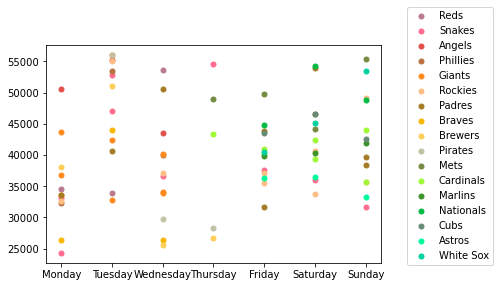

In [10]:
display_size = 40

fig,ax = plt.subplots()
field = 'opponent'
for loop_val in df[field].unique():
    ax.scatter(df[df[field]==loop_val]['day_of_week'],df[df[field]==loop_val]['attend'],label=loop_val,s=25,color=team_color[loop_val])

    plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()
    

[ 1  2  4  6 10 12 14 15 16 17 18 19 21 25 28 29 30]


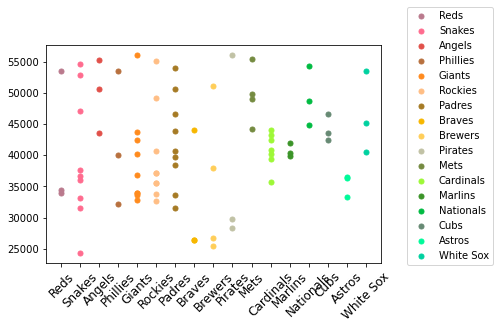

In [11]:
td = df.sort_values('opponent_cat')

display_size = 12
print(td['opponent_cat'].unique())
fig,ax = plt.subplots()
field = 'opponent'
for loop_val in df[field].unique():
    ax.scatter(df[df[field]==loop_val][field],df[df[field]==loop_val]['attend'],label=loop_val,s=25,color=team_color[loop_val])


plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.xticks(rotation=45,fontsize=display_size)
plt.show()





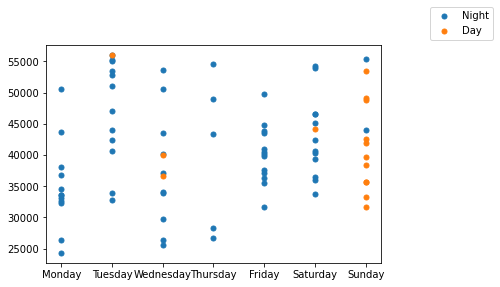

In [12]:
display_size = 40

fig,ax = plt.subplots()
field = 'day_night'
for loop_val in df[field].unique():
    ax.scatter(df[df[field]==loop_val]['day_of_week'],df[df[field]==loop_val]['attend'],label=loop_val,s=25)

    plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.show()
    

11    48753
30    50559
69    40619
Name: attend, dtype: int64


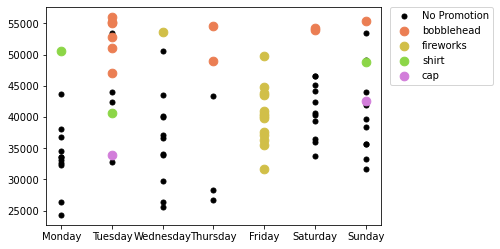

In [13]:
display_size = 40

print(df_cat[df_cat['shirt']==1]['attend'])


fig,ax = plt.subplots()

marker_style = dict(linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

ax.scatter(df['day_of_week'],df['attend'],s=25,label='No Promotion', color='black', marker='o')
ax.scatter(df[df['bobblehead']==1]['day_of_week'],df[df['bobblehead']==1]['attend'],label='bobblehead',s=75,color=promo_color['bobblehead'])
ax.scatter(df[df['fireworks']==1]['day_of_week'],df[df['fireworks']==1]['attend'],label='fireworks',s=75,color=promo_color['fireworks'])
ax.scatter(df[df['shirt']==1]['day_of_week'],df[df['shirt']==1]['attend'],label='shirt',s=75,color=promo_color['shirt'])
ax.scatter(df[df['cap']==1]['day_of_week'],df[df['cap']==1]['attend'],label='cap',s=75,color=promo_color['cap'])
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.025))
plt.show()
    
    

In [14]:
for group in df.groupby('day_of_week'):
    print(f"{group[0]}: {len(group[1])}")

Friday: 13
Monday: 12
Saturday: 13
Sunday: 13
Thursday: 5
Tuesday: 13
Wednesday: 12


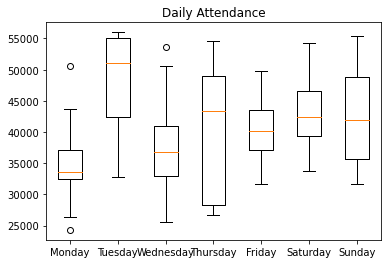

In [15]:
display_size = 40

weekly_attend = []
for day in df['day_of_week'].unique():
    weekly_attend.append((df[df['day_of_week']==day]['attend']))
weekly_attend = np.array(weekly_attend, dtype=object)
#print(weekly_attend)
    
#//*** Scatter plot all columns with attendance
fig,ax = plt.subplots()

ax.boxplot(weekly_attend, labels=df['day_of_week'].unique(),)
plt.title("Daily Attendance")
plt.show()
    
    

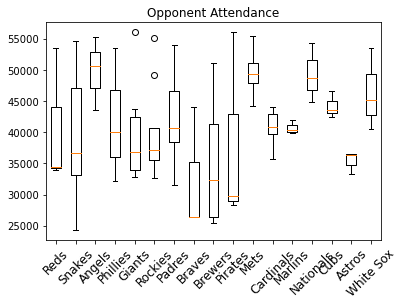

In [16]:
td = df.sort_values('opponent_cat')

opponent_attend = []

for opponent in df['opponent'].unique():
    opponent_attend.append((df[df['opponent']==opponent]['attend']))
opponent_attend = np.array(opponent_attend, dtype=object)

display_size = 12
#print(td['opponent_cat'].unique())

#//*** Scatter plot all columns with attendance
fig,ax = plt.subplots()

ax.boxplot(opponent_attend, labels=df['opponent'].unique())
plt.title("Opponent Attendance")
    

#plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.xticks(rotation=45,fontsize=display_size)
plt.show()



Max: 56000
Season Mean: 41040.07407407407
April Games: 12 Mean Attend: 39591 Total Attend: 475103 Growth Potential: 196897
May Games: 18 Mean Attend: 37345 Total Attend: 672223 Growth Potential: 335777
June Games: 9 Mean Attend: 47940 Total Attend: 431464 Growth Potential: 72536
July Games: 12 Mean Attend: 43884 Total Attend: 526611 Growth Potential: 145389
August Games: 15 Mean Attend: 42751 Total Attend: 641273 Growth Potential: 198727
September Games: 12 Mean Attend: 38955 Total Attend: 467461 Growth Potential: 204539
October Games: 3 Mean Attend: 36703 Total Attend: 110111 Growth Potential: 57889


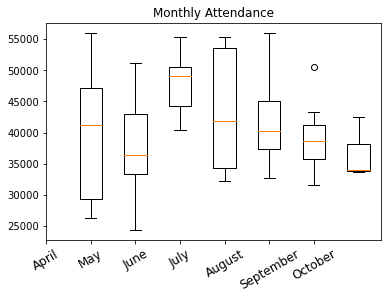

In [17]:
#td = df.sort_values('opponent_cat')
season_mean = df['attend'].mean()
max_attend = df['attend'].max()
print(f"Max: {max_attend}" )
print(f"Season Mean: {season_mean}")
t_list = []
t_labels = []
field = 'month'
for loop_val in df.sort_values('month_cat')[field].unique():

    t_list.append(df[df[field]==loop_val]['attend'])
    ls = df[df[field]==loop_val]['attend'] 
    potential =  (max_attend * len(ls)) - ls.sum()
    print(f"{loop_val} Games: {len(ls) } Mean Attend: {int(ls.mean())} Total Attend: {ls.sum()} Growth Potential: {potential}")
    t_labels.append(f"{loop_val}")
#    opponent_attend.append((df[df['opponent']==opponent]['attend']))
t_list = np.array(t_list, dtype=object)

display_size = 12

#//*** Scatter plot all columns with attendance
fig,ax = plt.subplots()

ax.boxplot(t_list, labels=df.sort_values('month_cat')[field].unique())
plt.title("Monthly Attendance")
    

#plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.2))
plt.xticks(np.arange(0,len(t_labels)),t_labels,rotation=30,fontsize=display_size)
plt.show()
    

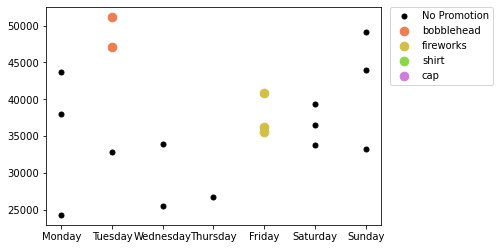

In [18]:
may_df = df[df['month']=='May'].copy()

may_df

fig,ax = plt.subplots()

marker_style = dict(linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

tdf = may_df

ax.scatter(tdf['day_of_week'],tdf['attend'],s=25,label='No Promotion', color='black', marker='o')
ax.scatter(tdf[tdf['bobblehead']==1]['day_of_week'],tdf[tdf['bobblehead']==1]['attend'],label='bobblehead',s=75,color=promo_color['bobblehead'])
ax.scatter(tdf[tdf['fireworks']==1]['day_of_week'],tdf[tdf['fireworks']==1]['attend'],label='fireworks',s=75,color=promo_color['fireworks'])
ax.scatter(tdf[tdf['shirt']==1]['day_of_week'],tdf[tdf['shirt']==1]['attend'],label='shirt',s=75,color=promo_color['shirt'])
ax.scatter(tdf[tdf['cap']==1]['day_of_week'],tdf[tdf['cap']==1]['attend'],label='cap',s=75,color=promo_color['cap'])
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.025))
plt.show()
    

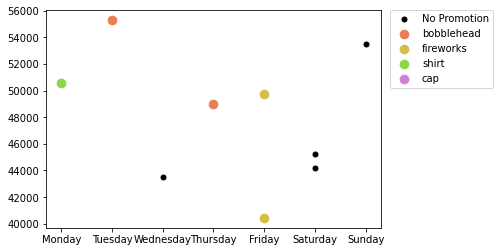

In [19]:
june_df = df[df['month']=='June'].copy()



fig,ax = plt.subplots()

marker_style = dict(linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

tdf = june_df

ax.scatter(tdf['day_of_week'],tdf['attend'],s=25,label='No Promotion', color='black', marker='o')
ax.scatter(tdf[tdf['bobblehead']==1]['day_of_week'],tdf[tdf['bobblehead']==1]['attend'],label='bobblehead',s=75,color=promo_color['bobblehead'])
ax.scatter(tdf[tdf['fireworks']==1]['day_of_week'],tdf[tdf['fireworks']==1]['attend'],label='fireworks',s=75,color=promo_color['fireworks'])
ax.scatter(tdf[tdf['shirt']==1]['day_of_week'],tdf[tdf['shirt']==1]['attend'],label='shirt',s=75,color=promo_color['shirt'])
ax.scatter(tdf[tdf['cap']==1]['day_of_week'],tdf[tdf['cap']==1]['attend'],label='cap',s=75,color=promo_color['cap'])
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.025))
plt.show()
    

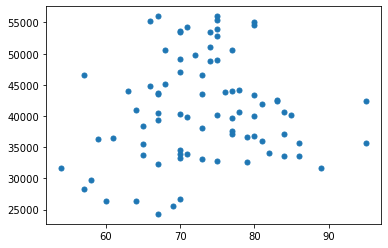

In [20]:
display_size = 40

fig,ax = plt.subplots()
field = 'temp'
ax.scatter(df['temp'],df['attend'],s=25)

    
plt.show()
    

attend
month
day
day_of_week
opponent
temp
skies
day_night
cap
shirt
fireworks
bobblehead


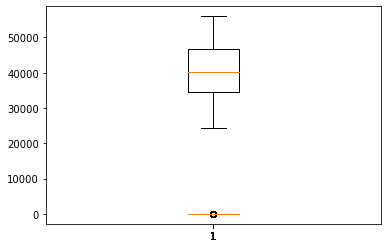

In [21]:
#//*** Scatter plot all columns with attendance
fig,ax = plt.subplots()

for col in df_cat.columns[1:]:
    print(col)
    
    ax.boxplot(df_cat[col])
    
plt.show()
    

attend


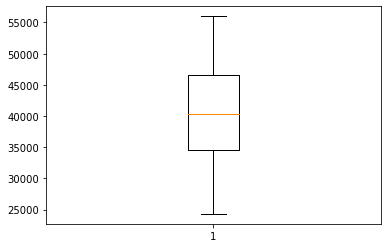

month


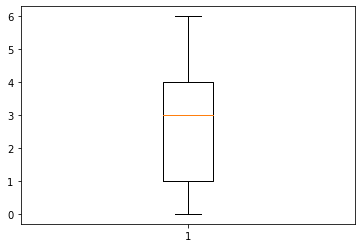

day


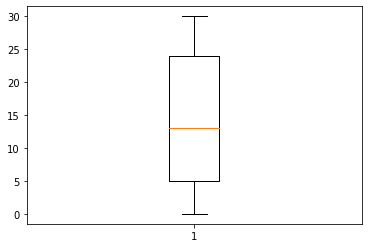

day_of_week


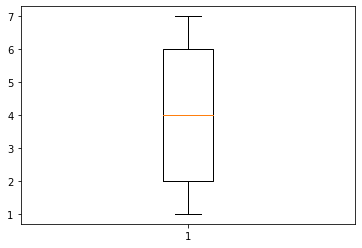

opponent


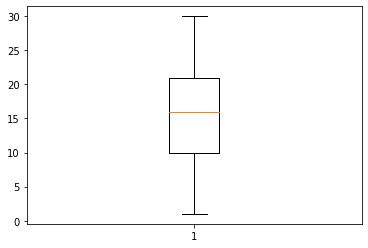

temp


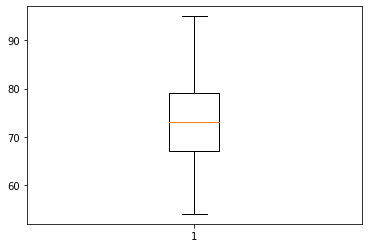

skies


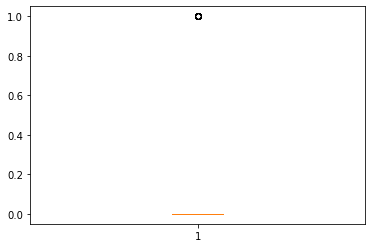

day_night


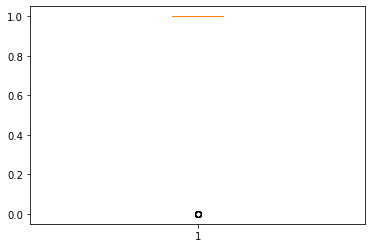

cap


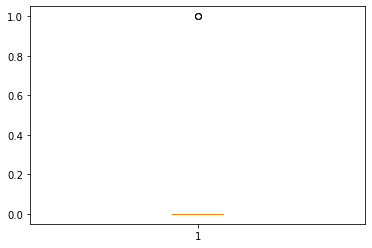

shirt


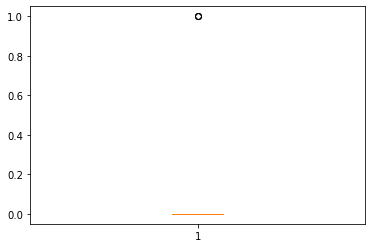

fireworks


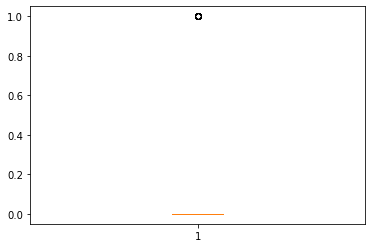

bobblehead


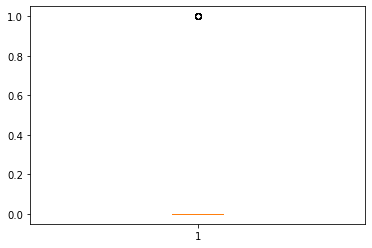

In [22]:
#//*** Scatter plot all columns with attendance
for col in df_cat.columns[1:]:
    print(col)
    fig,ax = plt.subplots()
    ax.boxplot(df_cat[col])
    
    plt.show()
    

In [23]:
abs(df_cat.corr()['attend'][1:])

month          0.049306
day            0.015967
day_of_week    0.125134
opponent       0.024032
temp           0.098951
skies          0.150963
day_night      0.043544
cap            0.055002
shirt          0.133269
fireworks      0.002094
bobblehead     0.581895
Name: attend, dtype: float64

0.38773712931828797
41633367.91675279


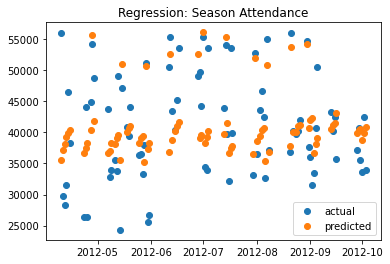

In [45]:
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
#print(df_cat)
#race_columns = (pop_attrib_df[['county',race]].sort_values(race,ascending=False)['county'])

#print(model_df[race_columns])
#//*** Build the X attributes using the x_column. These are separated for readability and modularity
x_model = np.array(df_cat['bobblehead']).reshape(1, -1)
x_model = pd.DataFrame(df_cat['day_of_week'])
x_model = df_cat[['bobblehead','opponent','day_of_week','temp','month']]

y_model = pd.DataFrame(df_cat['attend'])

#//*** Define the Linear Model
regr = linear_model.LinearRegression(n_jobs=-1)

#//*** Make Regression Magic
results = regr.fit(x_model, y_model)

y_predict = np.concatenate(results.predict(x_model))
print(results.score(x_model,y_model))
print(mean_squared_error(y_model,y_predict))


display_size = 40
fig,ax = plt.subplots()


ax.scatter(df_cat['date'],df_cat['attend'],label="actual")
ax.scatter(df_cat['date'],y_predict,label="predicted")
#ax.scatter(df['date'],results.predict(x_model)[0])
plt.legend()
plt.title("Regression: Season Attendance")
plt.show()

In [25]:
may_df

,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_order,opponent_cat,month_cat
18,2012-05-14,24312,May,14,Monday,Snakes,67,Clear,Night,0,0,0,0,1,16,1
12,2012-05-07,43713,May,07,Monday,Giants,67,Clear,Night,0,0,0,0,1,6,1
26,2012-05-28,38016,May,28,Monday,Brewers,73,Clear,Night,0,0,0,0,1,15,1
27,2012-05-29,51137,May,29,Tuesday,Brewers,74,Clear,Night,0,0,0,1,2,15,1
19,2012-05-15,47077,May,15,Tuesday,Snakes,70,Clear,Night,0,0,0,1,2,16,1
13,2012-05-08,32799,May,08,Tuesday,Giants,75,Clear,Night,0,0,0,0,2,6,1
14,2012-05-09,33993,May,09,Wednesday,Giants,71,Clear,Night,0,0,0,0,3,6,1
28,2012-05-30,25509,May,30,Wednesday,Brewers,69,Clear,Night,0,0,0,0,3,15,1
29,2012-05-31,26773,May,31,Thursday,Brewers,70,Clear,Night,0,0,0,0,4,15,1
20,2012-05-18,40906,May,18,Friday,Cardinals,64,Clear,Night,0,0,1,0,5,12,1


0.47387056813695483
29628428.72953232


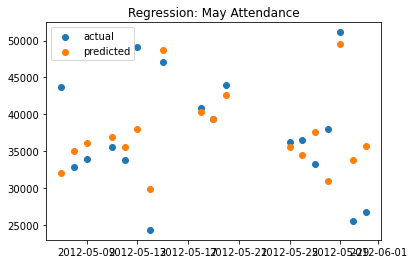

In [43]:
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
#print(df_cat)
#race_columns = (pop_attrib_df[['county',race]].sort_values(race,ascending=False)['county'])
model_df = may_df
#print(model_df[race_columns])
#//*** Build the X attributes using the x_column. These are separated for readability and modularity
x_model = np.array(df_cat['bobblehead']).reshape(1, -1)
x_model = pd.DataFrame(df_cat['day_of_week'])
x_model = model_df[['bobblehead','opponent_cat','day_order','temp','month_cat']]
x_model = model_df[['temp','day_order','opponent_cat','fireworks','cap','bobblehead']]


y_model = pd.DataFrame(model_df['attend'])

#//*** Define the Linear Model
regr = linear_model.LinearRegression(n_jobs=-1)

#//*** Make Regression Magic
results = regr.fit(x_model, y_model)



y_predict = np.concatenate(results.predict(x_model))

print(results.score(x_model,y_model))
print(mean_squared_error(y_model,y_predict))
display_size = 40
fig,ax = plt.subplots()


ax.scatter(model_df['date'],model_df['attend'],label="actual")
ax.scatter(model_df['date'],y_predict,label="predicted")
plt.legend()
plt.title("Regression: May Attendance")
#ax.scatter(df['date'],results.predict(x_model)[0])
plt.show()

In [28]:
#//***No Bobble head correlations
df_cat[df_cat['attend'] > season_mean].corr()['attend'][1:].sort_values()
nobob_df = df_cat[df_cat['bobblehead']==0]
nobob_mean = nobob_df['attend'].mean()
print("No Bob Mean: ",nobob_mean)
nobob_df[nobob_df['attend'] > nobob_mean].corr()['attend'][1:].sort_values()

No Bob Mean:  39137.92857142857


month         -0.336851
temp          -0.283067
day_of_week   -0.206268
day_night     -0.184101
opponent      -0.108796
cap           -0.082382
fireworks     -0.079511
skies         -0.012552
day            0.076473
shirt          0.126319
bobblehead          NaN
Name: attend, dtype: float64

In [46]:
#//*** May No Bobble head correlations
nobob_df[nobob_df['month']==1].corr()['attend'][1:].sort_values()

day_night     -0.306389
skies          0.031356
opponent       0.032683
temp           0.058091
day            0.080943
fireworks      0.125280
day_of_week    0.393484
month               NaN
cap                 NaN
shirt               NaN
bobblehead          NaN
Name: attend, dtype: float64

In [30]:
may_mean = df[df['month_cat']==1]['attend'].mean()

may_nobob_mean = df[(df['month_cat']==1) & (df['bobblehead']==0) ]['attend'].mean()

may_drop_bottom_mean = df[(df['month_cat']==1) & (df['attend']>30000) ]['attend'].mean()

print(f"Season Mean: {season_mean}")
print(f"May Mean: {may_mean}")
print(f"May Nobob Mean: {may_nobob_mean}")
print(f"Mean after dropping Lowest: {may_drop_bottom_mean}")

df[df['month_cat']==1].sort_values("date")


      

Season Mean: 41040.07407407407
May Mean: 37345.72222222222
May Nobob Mean: 35875.5625
Mean after dropping Lowest: 39708.6


,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_order,opponent_cat,month_cat
12,2012-05-07,43713,May,07,Monday,Giants,67,Clear,Night,0,0,0,0,1,6,1
13,2012-05-08,32799,May,08,Tuesday,Giants,75,Clear,Night,0,0,0,0,2,6,1
14,2012-05-09,33993,May,09,Wednesday,Giants,71,Clear,Night,0,0,0,0,3,6,1
15,2012-05-11,35591,May,11,Friday,Rockies,65,Clear,Night,0,0,1,0,5,28,1
16,2012-05-12,33735,May,12,Saturday,Rockies,65,Clear,Night,0,0,0,0,6,28,1
17,2012-05-13,49124,May,13,Sunday,Rockies,70,Clear,Day,0,0,0,0,7,28,1
18,2012-05-14,24312,May,14,Monday,Snakes,67,Clear,Night,0,0,0,0,1,16,1
19,2012-05-15,47077,May,15,Tuesday,Snakes,70,Clear,Night,0,0,0,1,2,16,1
20,2012-05-18,40906,May,18,Friday,Cardinals,64,Clear,Night,0,0,1,0,5,12,1
21,2012-05-19,39383,May,19,Saturday,Cardinals,67,Clear,Night,0,0,0,0,6,12,1


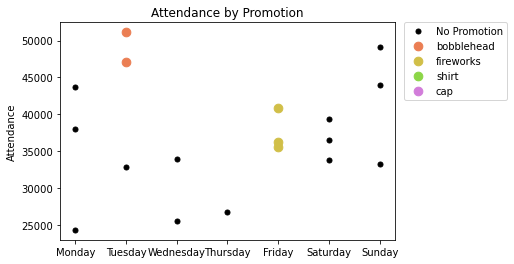

In [31]:
display_size = 40




#plot_df = df[df['bobblehead']==0 ]
plot_df = df[df['month_cat']==1]
fig,ax = plt.subplots()

marker_style = dict(linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

ax.scatter(plot_df['day_of_week'],plot_df['attend'],s=25,label='No Promotion', color='black', marker='o')
ax.scatter(plot_df[plot_df['bobblehead']==1]['day_of_week'],plot_df[plot_df['bobblehead']==1]['attend'],label='bobblehead',s=75,color=promo_color['bobblehead'])
ax.scatter(plot_df[plot_df['fireworks']==1]['day_of_week'],plot_df[plot_df['fireworks']==1]['attend'],label='fireworks',s=75,color=promo_color['fireworks'])
ax.scatter(plot_df[plot_df['shirt']==1]['day_of_week'],plot_df[plot_df['shirt']==1]['attend'],label='shirt',s=75,color=promo_color['shirt'])
ax.scatter(plot_df[plot_df['cap']==1]['day_of_week'],plot_df[plot_df['cap']==1]['attend'],label='cap',s=75,color=promo_color['cap'])
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1.025))
plt.ylabel("Attendance")
plt.title("Attendance by Promotion")
plt.show()
    
    

In [32]:
plot_df

,date,attend,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_order,opponent_cat,month_cat
18,2012-05-14,24312,May,14,Monday,Snakes,67,Clear,Night,0,0,0,0,1,16,1
12,2012-05-07,43713,May,07,Monday,Giants,67,Clear,Night,0,0,0,0,1,6,1
26,2012-05-28,38016,May,28,Monday,Brewers,73,Clear,Night,0,0,0,0,1,15,1
27,2012-05-29,51137,May,29,Tuesday,Brewers,74,Clear,Night,0,0,0,1,2,15,1
19,2012-05-15,47077,May,15,Tuesday,Snakes,70,Clear,Night,0,0,0,1,2,16,1
13,2012-05-08,32799,May,08,Tuesday,Giants,75,Clear,Night,0,0,0,0,2,6,1
14,2012-05-09,33993,May,09,Wednesday,Giants,71,Clear,Night,0,0,0,0,3,6,1
28,2012-05-30,25509,May,30,Wednesday,Brewers,69,Clear,Night,0,0,0,0,3,15,1
29,2012-05-31,26773,May,31,Thursday,Brewers,70,Clear,Night,0,0,0,0,4,15,1
20,2012-05-18,40906,May,18,Friday,Cardinals,64,Clear,Night,0,0,1,0,5,12,1


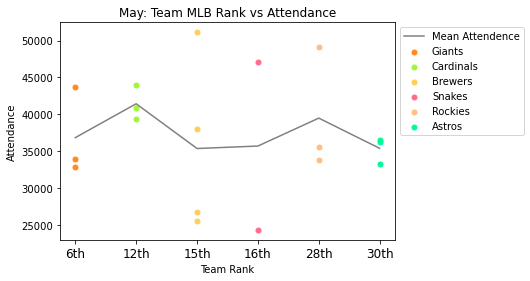

In [33]:

display_size = 12
plot_df = df[(df['month_cat']==1)  ]

fig,ax = plt.subplots()
field = 'opponent'
ranks = []
mean_rank = []
mean_attend = []
for loop_val in plot_df.sort_values('opponent_cat')[field].unique():
    ranks.append(f"{plot_df[plot_df[field]==loop_val]['opponent_cat'].unique()[0]}th")
    ax.scatter(plot_df[plot_df[field]==loop_val][field],plot_df[plot_df[field]==loop_val]['attend'],label=loop_val,s=25,color=team_color[loop_val])
    
    mean_rank.append(plot_df[plot_df[field]==loop_val][field].unique()[0])
    mean_attend.append(plot_df[plot_df[field]==loop_val]['attend'].mean())
ax.plot(mean_rank,mean_attend,color='gray', label='Mean Attendence')  
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.xticks(np.arange(0,len(ranks)),ranks,fontsize=display_size)
plt.title("May: Team MLB Rank vs Attendance")
plt.xlabel("Team Rank")
plt.ylabel("Attendance")
plt.show()





In [34]:
may_corrs = abs(df_cat[df_cat['month'] == 1].corr()['attend']).sort_values(ascending=False)[1:-3]
may_corrs

bobblehead     0.554117
temp           0.206094
day_night      0.182296
day_of_week    0.118797
skies          0.043520
day            0.028278
opponent       0.027044
fireworks      0.014756
Name: attend, dtype: float64

In [35]:
may_nobob_corrs = (df_cat[(df_cat['month'] == 1) & (df_cat['bobblehead'] == 0) ].corr()['attend']).sort_values(ascending=False)[1:-4]
may_nobob_corrs

day_of_week    0.393484
fireworks      0.125280
day            0.080943
temp           0.058091
opponent       0.032683
skies          0.031356
day_night     -0.306389
Name: attend, dtype: float64

In [36]:
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
#print(df_cat)
#race_columns = (pop_attrib_df[['county',race]].sort_values(race,ascending=False)['county'])
plot_df = df_cat[df_cat['month']==1]


#print(model_df[race_columns])
#//*** Build the X attributes using the x_column. These are separated for readability and modularity
x_model = plot_df[list(may_corrs.index)]


y_model = pd.DataFrame(plot_df['attend'])


#//*** Define the Linear Model
regr = linear_model.LinearRegression(n_jobs=-1)

#//*** Make Regression Magic
results = regr.fit(x_model, y_model)

df_predict = np.concatenate(results.predict(x_model))

#print(results.score(x_model,y_model))
#print(mean_squared_error(y_model,df_predict))
print("May Coefficients")
print(pd.Series(results.coef_[0], index=list(may_corrs.index)))


May Coefficients
bobblehead     17171.787659
temp             220.187389
day_night      -6375.591755
day_of_week     2580.555137
skies           9482.333594
day             -349.801171
opponent        -759.837581
fireworks       2762.821064
dtype: float64


0.4050993605620733
25810216.066726275
May Coefficients
temp            156.585704
day_night     -6241.960279
day_of_week    2713.223555
skies          9456.731241
day            -386.098461
opponent       -802.665363
fireworks      2266.551999
dtype: float64


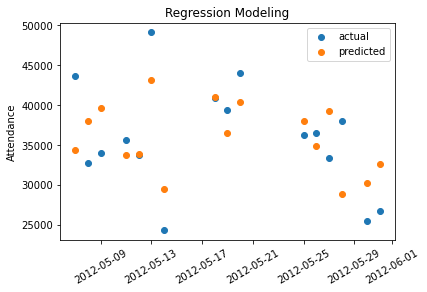

In [37]:
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
#print(df_cat)
#race_columns = (pop_attrib_df[['county',race]].sort_values(race,ascending=False)['county'])
plot_df = df_cat[(df_cat['month']==1) & (df['bobblehead']==0)]


#print(model_df[race_columns])
#//*** Build the X attributes using the x_column. These are separated for readability and modularity
x_model = plot_df[list(may_corrs.index)]


y_model = pd.DataFrame(plot_df['attend'])


#//*** Define the Linear Model
regr = linear_model.LinearRegression(n_jobs=-1)

#//*** Make Regression Magic
results = regr.fit(x_model, y_model)

df_predict = np.concatenate(results.predict(x_model))

print(results.score(x_model,y_model))
print(mean_squared_error(y_model,df_predict))
print("May Coefficients")
print(pd.Series(results.coef_[0][1:], index=list(may_corrs.index[1:])))

display_size = 40
fig,ax = plt.subplots()


ax.scatter(plot_df['date'],plot_df['attend'],label="actual")
ax.scatter(plot_df['date'],df_predict,label="predicted")
plt.xticks(rotation=30)
plt.ylabel('Attendance')
plt.title("Regression Modeling")
plt.legend()
#ax.scatter(df['date'],results.predict(x_model)[0])
plt.show()

In [38]:
(df_cat.corr()['attend'][1:]).sort_values(ascending=False)



bobblehead     0.581895
shirt          0.133269
day_of_week    0.125134
temp           0.098951
month          0.049306
day            0.015967
fireworks      0.002094
opponent      -0.024032
day_night     -0.043544
cap           -0.055002
skies         -0.150963
Name: attend, dtype: float64

In [39]:
(df_cat[(df_cat['bobblehead']==0) & (df_cat['shirt']==0) & (df_cat['cap']==0) ].corr()['attend'][1:-4]).sort_values(ascending=False)

day_of_week    0.240866
day            0.104732
month          0.097992
temp           0.084542
opponent       0.028797
skies         -0.130995
day_night     -0.167516
Name: attend, dtype: float64

In [40]:
print(df.head(3))
df[(df['month_cat']==1) & (df['attend']< 39137) ]

print(len(df[(df['month_cat']==1)]))
 #

         date  attend month day day_of_week opponent  temp   skies day_night  \
40 2012-07-02   34493  July  02      Monday     Reds    70  Clear      Night   
18 2012-05-14   24312   May  14      Monday   Snakes    67  Clear      Night   
30 2012-06-11   50559  June  11      Monday   Angels    68  Clear      Night   

    cap  shirt  fireworks  bobblehead  day_order  opponent_cat  month_cat  
40    0      0          0           0          1             2          3  
18    0      0          0           0          1            16          1  
30    0      1          0           0          1            10          2  
18
